<a href="https://colab.research.google.com/github/raushan1info/python/blob/master/Stroke_Prediction_using_NHANESData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data for Preprocessing

In [ ]:
# Importing useful liberary for this project
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
# Datafile path and explicitly declaring dfs name
path=['https://raw.githubusercontent.com/raushan1info/python/master/Medical_Data/demographic.csv',
      'https://raw.githubusercontent.com/raushan1info/python/master/Medical_Data/diet.csv',
      'https://raw.githubusercontent.com/raushan1info/python/master/Medical_Data/examination.csv',
      'https://raw.githubusercontent.com/raushan1info/python/master/Medical_Data/labs.csv',
      'https://raw.githubusercontent.com/raushan1info/python/master/Medical_Data/medications.csv',
      'https://raw.githubusercontent.com/raushan1info/python/master/Medical_Data/questionnaire.csv']
dfname=['demo','diet','exam','lab','medi','quest']

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# creating dfs 
df={}
dfn=dict(zip(dfname,path))
df={key:pd.read_csv(value,encoding= 'unicode_escape') for key, value in dfn.items()}

In [ ]:
# Creating 
Xs={k : v for k,v in df.items() if k in ['demo','exam','lab']}
dfs=Xs.values()

In [ ]:
# Importing this lib which enable us to work with other functions and callable objects to use or extend them without completely rewriting them
from functools import partial,reduce

In [ ]:
# creating a function using other functions
inner_join=partial(pd.merge,how='inner',on='SEQN')

In [ ]:
c=reduce(inner_join,dfs)
c

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,8,2,1,26,NaN,2,2,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.0,531.4
9809,83728,8,2,2,2,24.0,1,1,2.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,8,2,2,42,NaN,4,4,2.0,NaN,...,0.135,0.0,0.132,0.0,0.0081,0.0,2.0,9.75,388.0,286.3
9811,83730,8,2,1,7,NaN,2,2,1.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check duplicate SEQN count
#c.SEQN.duplicated().value_counts()
c.SEQN.nunique()

9813

In [ ]:
# combined dfs
# MCQ160F is the target feature. MCQ160f is a question which is "Ever told you had a stroke". It holds numeric values which indicates 1. -> Yes,2.0 -> No , 9.0 -> Don't know
qs=df['quest'][['SEQN','MCQ160F']]
qs

,SEQN,MCQ160F
0,73557,1.0
1,73558,2.0
2,73559,2.0
3,73560,NaN
4,73561,2.0
...,...,...
10170,83727,2.0
10171,83728,NaN
10172,83729,2.0
10173,83730,NaN


In [ ]:
# Merging question datafile with df (c)
c=pd.merge(c,qs,how='left',on='SEQN')

In [ ]:
c.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI,MCQ160F
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7,1.0
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2,2.0
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2,2.0
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN,NaN
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1,2.0


In [ ]:

c.SEQN.groupby(c.MCQ160F).count()
#c.MCQ160F.value_counts()

MCQ160F
1.0     194
2.0    5389
9.0       5
Name: SEQN, dtype: int64

In [ ]:
# Dropping Nan and 9. values from the target feature MCQ160F
c=c[(c.MCQ160F.notnull()) & (c.MCQ160F !=9)]

In [ ]:
c.MCQ160F.describe()

count    5583.000000
mean        1.965252
std         0.183158
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: MCQ160F, dtype: float64

In [ ]:
 # import code book
# cbook = pd.read_csv('/kaggle/input/nhanes-2013-2014-codebook-with-sas-label/nhanes_2013_2014_codebook.csv')

# Data Cleaning
    1. Drop all Non-numeric values
    2. Drop column(s) which has more than 50% Nan values
    3. Change targeting values coding 1,2 to 0 (Negative) & 1 (positive)

In [ ]:
# Dropping all Non-numeric values
# Creating another df as d after removing Non-numeric values from c  
d=c.select_dtypes(['number'])

# Drop column(s) which has more than 50% Nan values
d=d.dropna(axis=1,thresh=0.5*len(d))

# Total number of remaining columns
print(len(d.columns),'column(s) left')

284 column(s) left


In [ ]:
# Changing targeting values coding 1,2 to 0 (Negative) & 1 (positive)
d['MCQ160F']=d.apply(lambda x : 1 if x.MCQ160F==1 else 0,axis='columns')
d.MCQ160F.value_counts()

0    5389
1     194
Name: MCQ160F, dtype: int64

Feature Selection

In [ ]:
d.MCQ160F.value_counts()

0    5389
1     194
Name: MCQ160F, dtype: int64

0
1


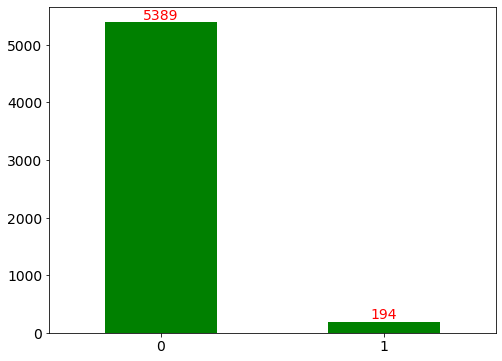

In [ ]:

#d['MCQ160F'].value_counts().plot(kind='bar')
#d.SEQN.groupby(d.MCQ160F).count()
val=d.MCQ160F.value_counts()
plt.figure(figsize=(8,6))
plt.rc('font',size=14)
ax=val.plot.bar(rot=0,color='green')

for i in range(len(val)):
  print(i)
  ax.annotate(s=val[i],xy=[val.index[i],val[i]],ha='center',va='bottom',color='red')

In [ ]:
d.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,...,LBXTC,LBDTCSI,LBXTTG,WTSH2YR.y,URXUTRI,URXVOL1,URDFLOW1,LBDB12,LBDB12SI,MCQ160F
0,73557,8,2,1,69,4,4,1.0,1.0,1,...,167.0,4.32,2.0,NaN,NaN,87.0,0.821,524.0,386.7,1
1,73558,8,2,1,54,3,3,1.0,2.0,1,...,170.0,4.40,2.0,49123.400015,2.0,90.0,1.636,507.0,374.2,0
2,73559,8,2,1,72,3,3,2.0,1.0,1,...,126.0,3.26,2.0,115794.742161,NaN,66.0,NaN,732.0,540.2,0
4,73561,8,2,2,73,3,3,1.0,2.0,1,...,201.0,5.20,2.0,NaN,NaN,5.0,0.109,225.0,166.1,0
5,73562,8,2,1,56,1,1,1.0,1.0,1,...,226.0,5.84,2.0,47860.935312,2.0,197.0,1.187,750.0,553.5,0


In [ ]:
from sklearn.impute import SimpleImputer
smp_imp=SimpleImputer(strategy='most_frequent')
d=pd.DataFrame(smp_imp.fit_transform(d),columns=d.columns)

In [ ]:

x=d.loc[:,d.columns!='MCQ160F']
y=d.MCQ160F

In [ ]:
print('x shape : {0}'.format(x.shape))
print('y shape : {0}'.format(y.shape))

x shape : (5583, 283)
y shape : (5583,)


# Data Selection for ML Model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=12)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
xgclass=XGBClassifier()
xgclass.fit(x_train,y_train)
y_pred=xgclass.predict(x_test)
score=accuracy_score(y_test,y_pred)
print('accuracy_score %.2f%%' %(score*100))

print('metrics: ',confusion_matrix(y_test,y_pred))

def conf_metrics(test,pred):
  conf=pd.DataFrame(confusion_matrix(test,pred),index=['True[0]','True[1]'],columns=['pred[0]','pred[1]'])
  print('Confusion_metrics :->')
  print(conf)
  return conf

conf_metrics(y_test,y_pred)

accuracy_score 96.24%
metrics:  [[1075    1]
 [  41    0]]
Confusion_metrics :->
         pred[0]  pred[1]
True[0]     1075        1
True[1]       41        0


,pred[0],pred[1]
True[0],1075,1
True[1],41,0


In [ ]:
print(y_test.value_counts())
#print(y_pred.value_counts())


0.0    1076
1.0      41
Name: MCQ160F, dtype: int64


# Using SMOTE for oversampling 

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_sm,y_train_sm=smote.fit_resample(x_train,y_train)
x_test_sm,y_test_sm=smote.fit_resample(x_test,y_test)
x_train_sm=pd.DataFrame(x_train_sm,columns=x.columns)
x_test_sm=pd.DataFrame(x_test_sm,columns=x.columns)

In [ ]:
model=XGBClassifier()
model.fit(x_train_sm,y_train_sm)
y_pred_sm=model.predict(x_test_sm)
score=accuracy_score(y_test_sm,y_pred_sm)
print('accuracy_score %.2f%%' %(score*100))

print('metrics: ',confusion_matrix(y_test_sm,y_pred_sm))

conf=pd.DataFrame(confusion_matrix(y_test_sm,y_pred_sm),index=['True[0]','True[1]'],columns=['pred[0]','pred[1]'])
conf


accuracy_score 96.93%
metrics:  [[1072    4]
 [  62 1014]]


,pred[0],pred[1]
True[0],1072,4
True[1],62,1014


In [ ]:
#model.x_train_sm
keys=list(model.get_booster().feature_names)
values=list(model.feature_importances_)
data=pd.DataFrame(data=values,index=keys,columns=['score']).sort_values(by='score',ascending=False)

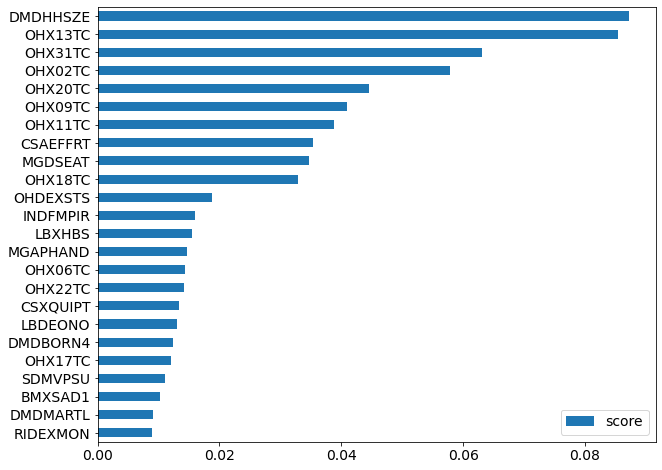

In [ ]:
xgbs=data[:24]
xgbs.sort_values(by='score',ascending=True).plot(kind='barh',figsize=(10,8))

In [ ]:
xgbs.reset_index(inplace=True)

In [ ]:
xgbs.head()

,index,score
0,DMDHHSZE,0.087214
1,OHX13TC,0.085363
2,OHX31TC,0.063070
3,OHX02TC,0.057875
4,OHX20TC,0.044479


In [ ]:
xgbs.columns=['variable','score']

In [ ]:
xgbs['variable']=xgbs['variable'].apply(lambda x:x.upper())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
xgbs.head()

,variable,score
0,DMDHHSZE,0.087214
1,OHX13TC,0.085363
2,OHX31TC,0.063070
3,OHX02TC,0.057875
4,OHX20TC,0.044479


### CodeBook



1.  Goal is to get the variable description
2.   Reading html and fetching variable details



In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import urllib
import re

In [ ]:
urls = {'DEMO':'https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics&CycleBeginYear=2013',
        'DIET':'https://wwwn.cdc.gov/nchs/nhanes/Search/DataPage.aspx?Component=Dietary&CycleBeginYear=2013',
        'EXAM':'https://wwwn.cdc.gov/nchs/nhanes/Search/DataPage.aspx?Component=Examination&CycleBeginYear=2013',
        'LAB':'https://wwwn.cdc.gov/nchs/nhanes/Search/DataPage.aspx?Component=Laboratory&CycleBeginYear=2013',
        'QUEST':'https://wwwn.cdc.gov/nchs/nhanes/Search/DataPage.aspx?Component=Questionnaire&CycleBeginYear=2013'}

#'demo','diet','exam','lab','medi','quest'

def parse_main(url,links,category):
  page=requests.get(url)
  soup=bs(page.content,'html.parser')
  table=soup.find('table')

  for link in table.find_all('a'):
    if str(link.get('href')).endswith('.htm')==True:
      link_j=urllib.parse.urljoin('https://wwwn.cdc.gov/',link.get('href'))
      links[category].append(link_j)
      #print('found 1',links)


links={v:[] for v in urls.keys()}
#print(links)

for k,url in urls.items():
  #print(k,url)
  parse_main(url,links,k) 


In [ ]:
# page=requests.get('https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics&CycleBeginYear=2013')
# soup=bs(page.content,'html.parser')
# table=soup.find('table')
# for link in table.find_all('a'):
#     if str(link.get('href')).endswith('.htm')==True:
#       link_j=urllib.parse.urljoin('https://wwwn.cdc.gov/',link.get('href'))
#       print(link_j)

https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DEMO_H.htm


In [ ]:
code={'category':[],'variable':[],'label':[]}
def parse_nhanes(links,code):
  for c,urls in links.items():
    for url in urls:
      page=requests.get(url)
      soup=bs(page.content,'html.parser')
      container=soup.find_all('dl')
      for i in container:
        try:
          varname=str(i.find('dt',string='Variable Name: ').findNext('dd').text)
          saslabel=str(i.find('dt',string='SAS Label: ').findNext('dd').text)
          code['category'].append(c)
          code['variable'].append(varname.strip())
          code['label'].append(saslabel.strip())

        except:
          pass
  return code

    
parse_nhanes(links,code)


In [ ]:
codebook=pd.DataFrame(code)
codebook_unique=codebook[['variable','label']].drop_duplicates(subset=['variable'])


In [ ]:
xgbs=pd.merge(left=xgbs,right=codebook_unique,left_on='variable',right_on='variable',how='left')

In [ ]:
var_name=xgbs.variable.to_list()
var_name.append('MCQ160F')
print(var_name)

['DMDHHSZE', 'OHX13TC', 'OHX31TC', 'OHX02TC', 'OHX20TC', 'OHX09TC', 'OHX11TC', 'CSAEFFRT', 'MGDSEAT', 'OHX18TC', 'OHDEXSTS', 'INDFMPIR', 'LBXHBS', 'MGAPHAND', 'OHX06TC', 'OHX22TC', 'CSXQUIPT', 'LBDEONO', 'DMDBORN4', 'OHX17TC', 'SDMVPSU', 'BMXSAD1', 'DMDMARTL', 'RIDEXMON', 'MCQ160F']


In [ ]:
d.shape

(5583, 284)

In [ ]:
df_final=d.filter(var_name)
df_final

,DMDHHSZE,OHX13TC,OHX31TC,OHX02TC,OHX20TC,OHX09TC,OHX11TC,CSAEFFRT,MGDSEAT,OHX18TC,...,OHX22TC,CSXQUIPT,LBDEONO,DMDBORN4,OHX17TC,SDMVPSU,BMXSAD1,DMDMARTL,RIDEXMON,MCQ160F
0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,1.0,4.0,...,4.0,4.0,0.2,1.0,4.0,1.0,20.5,4.0,1.0,1.0
1,0.0,2.0,4.0,2.0,5.0,2.0,2.0,1.0,1.0,4.0,...,2.0,4.0,0.8,1.0,4.0,1.0,24.2,1.0,1.0,0.0
2,2.0,2.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,...,2.0,1.0,0.4,1.0,4.0,1.0,25.8,1.0,2.0,0.0
3,2.0,2.0,4.0,4.0,4.0,4.0,2.0,1.0,2.0,4.0,...,2.0,2.0,0.2,1.0,4.0,2.0,19.0,1.0,1.0,0.0
4,0.0,4.0,4.0,2.0,4.0,2.0,2.0,1.0,1.0,4.0,...,2.0,4.0,0.6,1.0,2.0,1.0,29.1,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578,2.0,4.0,5.0,4.0,4.0,5.0,5.0,2.0,1.0,4.0,...,2.0,2.0,0.1,1.0,4.0,1.0,24.8,1.0,2.0,0.0
5579,2.0,2.0,4.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,4.0,0.1,1.0,4.0,1.0,21.0,1.0,1.0,0.0
5580,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,1.0,0.1,2.0,4.0,2.0,23.0,4.0,1.0,0.0
5581,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,2.0,0.2,1.0,4.0,1.0,19.0,5.0,2.0,0.0


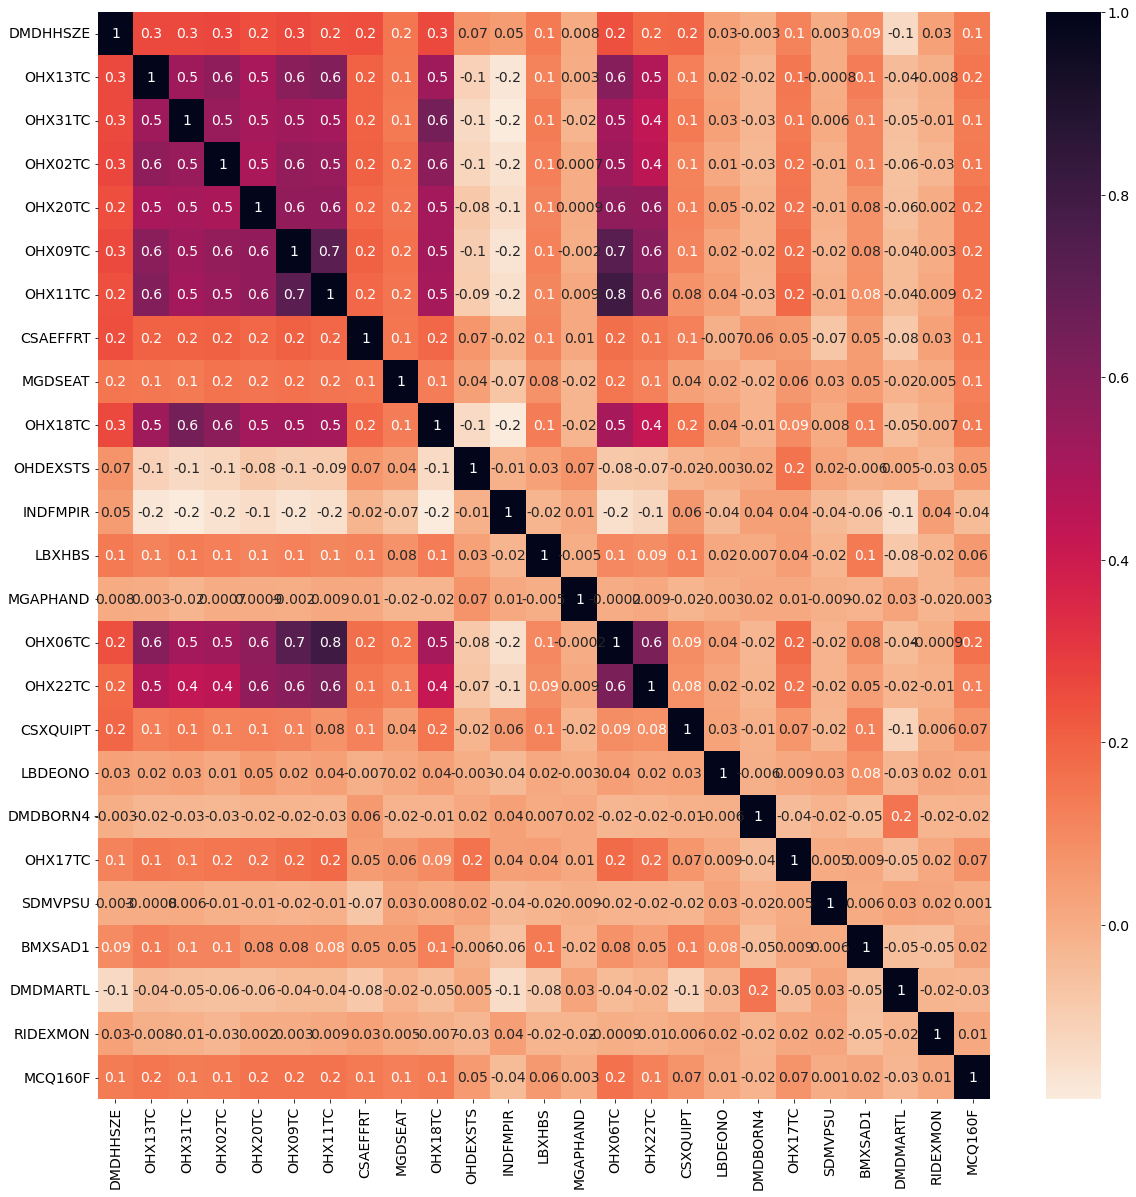

In [ ]:
ax=plt.subplots(figsize=(20,20))

sns.heatmap(data=df_final.corr(), cmap=sns.cm.rocket_r,annot=True, fmt='.1g')
#plt.xticks(rotation=15)

In [ ]:
x_=df_final.loc[:,df_final.columns!='MCQ160F']
y=df_final['MCQ160F']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax=MinMaxScaler()
X=pd.DataFrame(minmax.fit_transform(x_),columns=x_.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=11)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE()
X_train_sm,y_train_sm=smote.fit_resample(X_train,y_train)
X_train_sm=pd.DataFrame(X_train_sm,columns=X.columns)


In [ ]:
print('x train shape:',X_train.shape)
print('t train value count:\n',y_train.value_counts())
print()
print('x train shape:',X_train_sm.shape)
print('t train value count:\n',y_train_sm.value_counts())
print()
print('x train shape:',X_test.shape)
print('t train value count:\n',y_test.value_counts())

x train shape: (4187, 24)
t train value count:
 0.0    4033
1.0     154
Name: MCQ160F, dtype: int64

x train shape: (8066, 24)
t train value count:
 0.0    4033
1.0    4033
Name: MCQ160F, dtype: int64

x train shape: (1396, 24)
t train value count:
 0.0    1356
1.0      40
Name: MCQ160F, dtype: int64


In [ ]:
mscore=[]

# Logostic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced',random_state=11).fit(X_train_sm,y_train_sm)
y_pred=logreg.predict(X_test)



print('Accuracy score:',logreg.score(X_test,y_test))
print('predictions: ',y_pred)
mscore.append(['Logistic_Regression score',logreg.score(X_test,y_test)])

print('Classification report:',classification_report(y_test,y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy score: 0.7643266475644699
predictions:  [0. 0. 0. ... 0. 0. 1.]
Classification report:               precision    recall  f1-score   support

         0.0       0.99      0.76      0.86      1356
         1.0       0.09      0.80      0.16        40

    accuracy                           0.76      1396
   macro avg       0.54      0.78      0.51      1396
weighted avg       0.97      0.76      0.84      1396

confusion matrix:
 [[1035  321]
 [   8   32]]


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ranforcla=RandomForestClassifier(n_estimators=96,max_depth=5,random_state=11)
ranforcla.fit(X_train_sm,y_train_sm)
y_pred=ranforcla.predict(X_test)
print('Accuracy Score:',ranforcla.score(X_test,y_test))
print('Predictions:',y_pred)

mscore.append(['Random Forest Score :',ranforcla.score(X_test,y_test)])

print('classification report:',classification_report(y_test,y_pred))
print('confusion metrics:\n',confusion_matrix(y_test,y_pred))


Accuracy Score: 0.8617478510028653
Predictions: [0. 0. 0. ... 0. 0. 1.]
classification report:               precision    recall  f1-score   support

         0.0       0.99      0.87      0.92      1356
         1.0       0.12      0.60      0.20        40

    accuracy                           0.86      1396
   macro avg       0.55      0.73      0.56      1396
weighted avg       0.96      0.86      0.90      1396

confusion metrics:
 [[1179  177]
 [  16   24]]


# Gradient Boosting Decision Tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl=GradientBoostingClassifier(learning_rate=0.1, n_estimators=10,random_state=11)

In [ ]:
gbcl.fit(X_train_sm,y_train_sm)
y_pred=gbcl.predict(X_test)

print('accuracy score:',gbcl.score(X_test,y_test))
print('prediction:',y_pred)
mscore.append(['Gradient Boosting Decision Tree:',gbcl.score(X_test,y_test)])

print('classification report:',classification_report(y_test,y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))

accuracy score: 0.7585959885386819
prediction: [0. 0. 0. ... 0. 0. 1.]
classification report:               precision    recall  f1-score   support

         0.0       0.99      0.76      0.86      1356
         1.0       0.07      0.62      0.13        40

    accuracy                           0.76      1396
   macro avg       0.53      0.69      0.49      1396
weighted avg       0.96      0.76      0.84      1396

confusion matrix:
 [[1034  322]
 [  15   25]]


# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(learning_rate=0.1,n_estimators=30, random_state=11)

In [ ]:
abc.fit(X_train_sm,y_train_sm)
y_predict=abc.predict(X_test)

print("Accuracy Score : ",abc.score(X_test,y_test))
print("Prediction : ",y_predict)

mscore.append(['Ada Boost Classifire: ',abc.score(X_test,y_test)])

print('classification report: \n',classification_report(y_test,y_predict))
print('confusion matrix: \n',confusion_matrix(y_test,y_predict))

Accuracy Score :  0.7657593123209169
Prediction :  [0. 0. 0. ... 0. 0. 1.]
classification report: 
               precision    recall  f1-score   support

         0.0       0.99      0.77      0.86      1356
         1.0       0.07      0.62      0.13        40

    accuracy                           0.77      1396
   macro avg       0.53      0.70      0.50      1396
weighted avg       0.96      0.77      0.84      1396

confusion matrix: 
 [[1044  312]
 [  15   25]]


# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_clf=SVC(kernel='sigmoid',gamma='auto',random_state=11)
svc_clf.fit(X_train_sm,y_train_sm)
y_pred=svc_clf.predict(X_test)
#y_pred

print('Accuracy_score :',svc_clf.score(X_test,y_test))
print('Predictions : ',y_pred)
mscore.append(['SVC model score : ',svc_clf.score(X_test,y_test)])

print('classification report :\n',classification_report(y_test,y_pred))
print('confusion matrix : \n',confusion_matrix(y_test,y_pred))

Accuracy_score : 0.7263610315186246
Predictions :  [0. 0. 0. ... 0. 0. 1.]
classification report :
               precision    recall  f1-score   support

         0.0       0.99      0.72      0.84      1356
         1.0       0.08      0.82      0.15        40

    accuracy                           0.73      1396
   macro avg       0.54      0.77      0.49      1396
weighted avg       0.97      0.73      0.82      1396

confusion matrix : 
 [[981 375]
 [  7  33]]


# XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from numpy.ma.core import append
xgb=GradientBoostingClassifier(learning_rate=0.01,max_depth=3)
xgb.fit(X_train_sm,y_train_sm)
y_pred=xgb.predict(X_test)

print('Accuracy score : ',xgb.score(X_test,y_test))
print('Predictions : ',y_pred)
mscore.append(['xgb score : ',xgb.score(X_test,y_test)])

from sklearn.metrics import classification_report
print('Classification report : \n',classification_report(y_test,y_pred))
print('Confusion matrix :\n',confusion_matrix(y_test,y_pred))

Accuracy score :  0.7729226361031518
Predictions :  [0. 0. 0. ... 0. 0. 1.]
Classification report : 
               precision    recall  f1-score   support

         0.0       0.99      0.78      0.87      1356
         1.0       0.08      0.62      0.14        40

    accuracy                           0.77      1396
   macro avg       0.53      0.70      0.50      1396
weighted avg       0.96      0.77      0.85      1396

Confusion matrix :
 [[1054  302]
 [  15   25]]


In [ ]:
# scores=[]
# for i in range(90,130):
#   ranforcla_1=RandomForestClassifier(n_estimators=i,max_depth=5,random_state=11)
#   ranforcla_1.fit(X_train_sm,y_train_sm)
#   scores.append(['Accuracy Score @ {0}:'.format(i),ranforcla_1.score(X_test,y_test)])
# #y_pred=ranforcla.predict(X_test)

In [ ]:
y_test.shape

(1396,)

# Models Comparison

In [ ]:
mscore.sort(key=lambda x:x[1],reverse=True)


In [ ]:
mscore

[['Random Forest Score :', 0.8617478510028653],
 ['xgb score : ', 0.7729226361031518],
 ['Ada Boost Classifire: ', 0.7657593123209169],
 ['Logistic_Regression score', 0.7643266475644699],
 ['Gradient Boosting Decision Tree:', 0.7585959885386819],
 ['SVC model score : ', 0.7263610315186246]]

Accuracy Score :

Random Forest Score : 86.17%
xgb score :  77.29%
Ada Boost Classifire:  76.58%
Logistic_Regression score 76.43%
Gradient Boosting Decision Tree: 75.86%
SVC model score :  72.64%


Text(0.5, 1.0, 'Model Score Comparision')

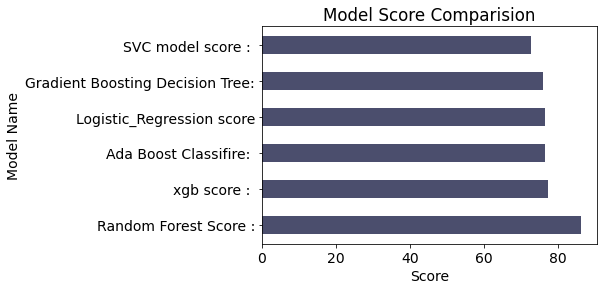

In [ ]:
model=list(i[0] for i in mscore)
score=list(round(i[1]*100,2) for i in mscore)
print('Accuracy Score :\n')
for m,s in zip(model,score):
  print(f'{m} {s}%')

plt.barh(model,score, height = 0.5, color='#4B4E6D')
plt.xlabel('Score')
plt.ylabel('Model Name')
plt.title('Model Score Comparision')
